<a href="https://colab.research.google.com/github/sabithasn/C117-Confusion/blob/main/Confusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("heart.csv")
print (df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [14]:
from sklearn.model_selection import train_test_split 

age = df["age"]
heartAttack = df["target"]

age_train, age_test, heartAttack_train, heartAttack_test = train_test_split(age, heartAttack, test_size = 0.25, random_state = 0)



In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heartAttack_train.ravel(), (len(heartAttack_train), 1))

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
X_test = np.reshape(age_test.ravel(), (len(age_test), 1))
Y_test = np.reshape(heartAttack_test.ravel(), (len(heartAttack_test), 1))

heartAttack_prediction = classifier.predict(X_test)

predictedValues = []
for i in heartAttack_prediction:
  if i == 0:
    predictedValues.append("No")
  else:
    predictedValues.append("Yes")

actualValues = []
for i in Y_test.ravel():
  if i == 0:
    actualValues.append("No")
  else:
    actualValues.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

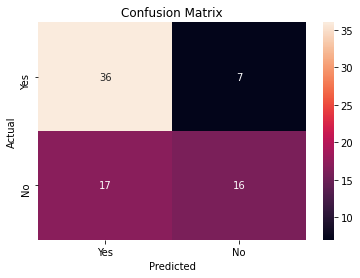

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
labels = ["Yes", "No"]

cm = confusion_matrix(actualValues, predictedValues, labels) 

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)

In [18]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X = np.reshape(age_train.ravel(), (len(age_train), 1))
Y = np.reshape(heartAttack_train.ravel(), (len(heartAttack_train), 1))

In [3]:
factors = df[["age", "sex","cp","chol","thalach"]]
heartAttack= df[["target"]]
from sklearn.model_selection import train_test_split 

factors_train, factors_test, heartAttack_train, heartAttack_test = train_test_split(factors, heartAttack, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 

factors_train = sc_x.fit_transform(factors_train)  
factors_test = sc_x.transform(factors_test) 

In [5]:

from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(factors_train, heartAttack_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
heartAttack_pred = classifier.predict(factors_test)

from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(heartAttack_test, heartAttack_pred))

Accuracy :  0.7368421052631579


In [19]:
predictedValues1 = []
for i in heartAttack_pred:
  if i==0:
    predictedValues1.append("No")
  else:
    predictedValues1.append("Yes")
actualValues1 =[]
for i in Y_test.ravel():
  if i == 0:
    actualValues1.append("No")
  else:
    actualValues1.append("Yes")

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

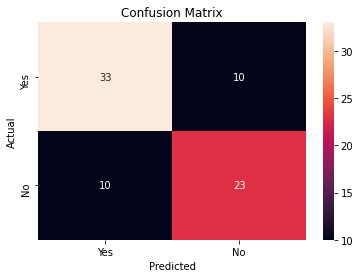

In [21]:
cm = confusion_matrix(actualValues1, predictedValues1, labels)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)